In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv('Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
df.info()
print(df.shape)
print(f"count of rows:{df.shape[0]}")
print(f"count of columns:{df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
(303, 14)
count of rows:303
count of columns:14


In [88]:
print(df.isnull().sum())
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
duplicates=df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [90]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [91]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [92]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

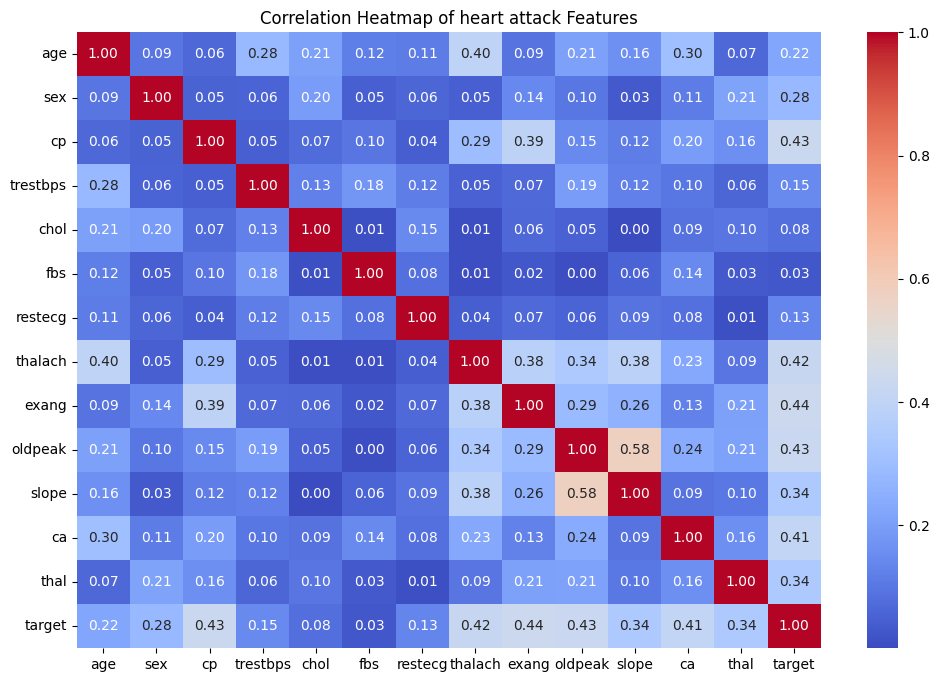

In [94]:
corr_matrix = df.corr() 
corr_val = np.abs(corr_matrix)

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_val, annot=True,cmap='coolwarm',fmt='.2f')

# annot=True: This adds the correlation values in each cell of the heatmap.

plt.title('Correlation Heatmap of heart attack Features')
plt.show()

C:\Users\f.mohebinejad\AppData\Local\Temp\ipykernel_13476\609214491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df ,palette=['#549D25','#FF6414'])


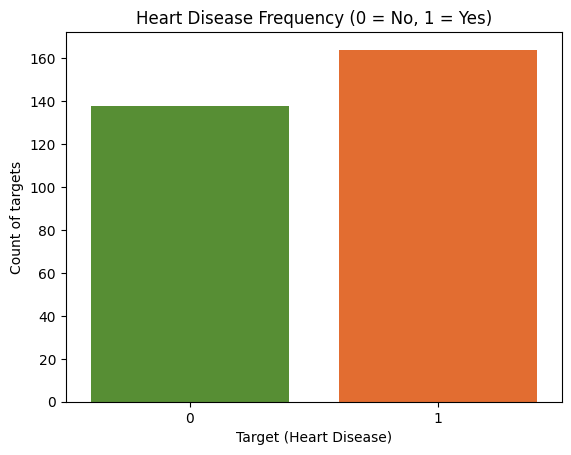

In [95]:
#target
sns.countplot(x='target',data=df ,palette=['#549D25','#FF6414'])
plt.title('Heart Disease Frequency (0 = No, 1 = Yes)')
plt.xlabel('Target (Heart Disease)')
plt.ylabel('Count of targets')
plt.show()

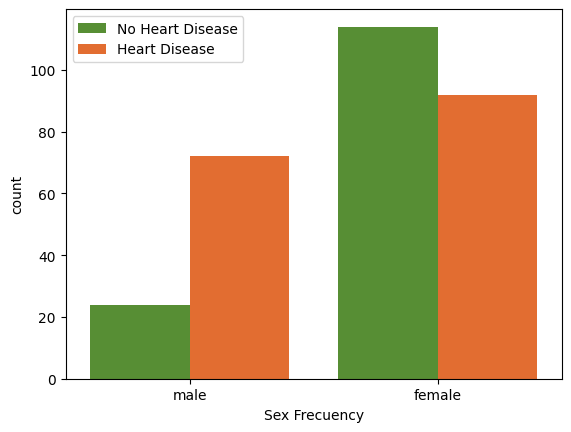

In [96]:
#target vs sex
sns.countplot(x='sex',data=df,palette=['#549D25','#FF6414'],hue='target')
plt.xticks([0,1],['male','female'])
plt.xlabel('Sex Frecuency')
plt.legend(labels=['No Heart Disease','Heart Disease'])
plt.show()

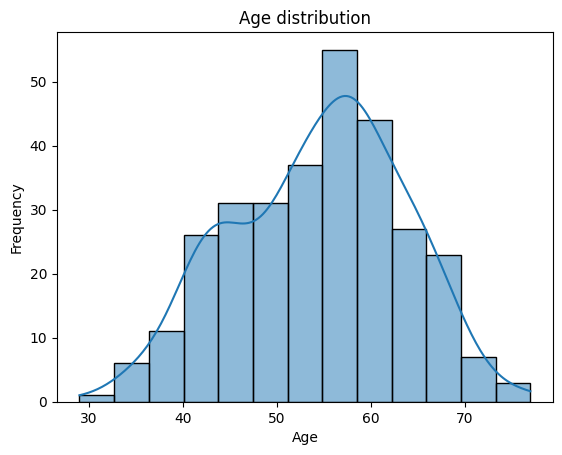

In [97]:
#age
sns.histplot(x='age',data=df,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

C:\Users\f.mohebinejad\AppData\Local\Temp\ipykernel_13476\411472636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette=['#549D25','#FF6414'])


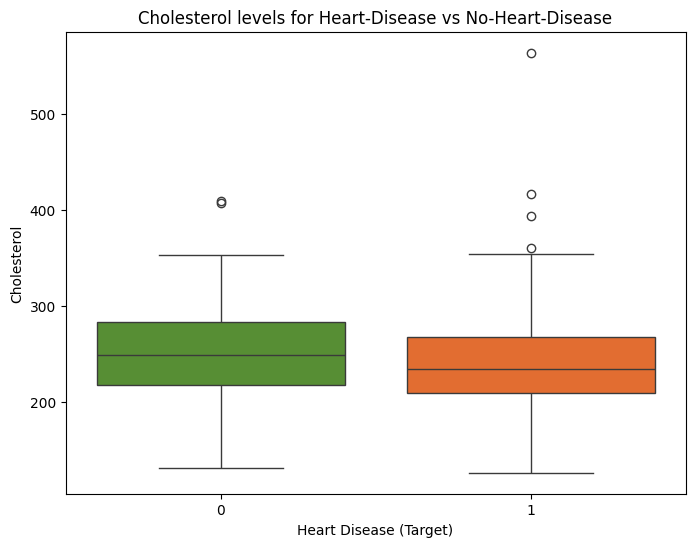

In [98]:
# Box plot of cholesterol (chol) levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df, palette=['#549D25','#FF6414'])
plt.title('Cholesterol levels for Heart-Disease vs No-Heart-Disease')
plt.xlabel('Heart Disease (Target)')
plt.ylabel('Cholesterol')
plt.show()

C:\Users\f.mohebinejad\AppData\Local\Temp\ipykernel_13476\2539726992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp',data=df,palette=["red", "green", "blue", "purple"])


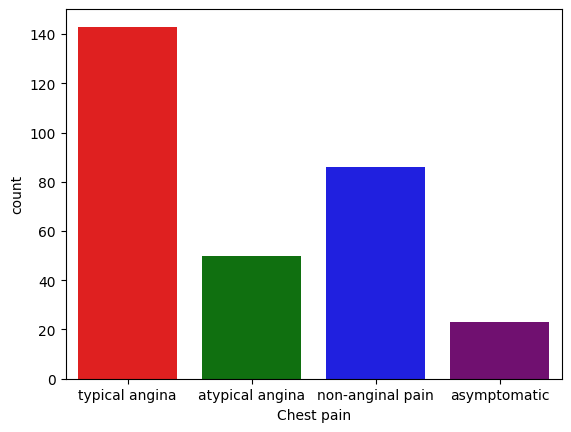

In [99]:
#cp
sns.countplot(x='cp',data=df,palette=["red", "green", "blue", "purple"])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xlabel('Chest pain')
plt.show()

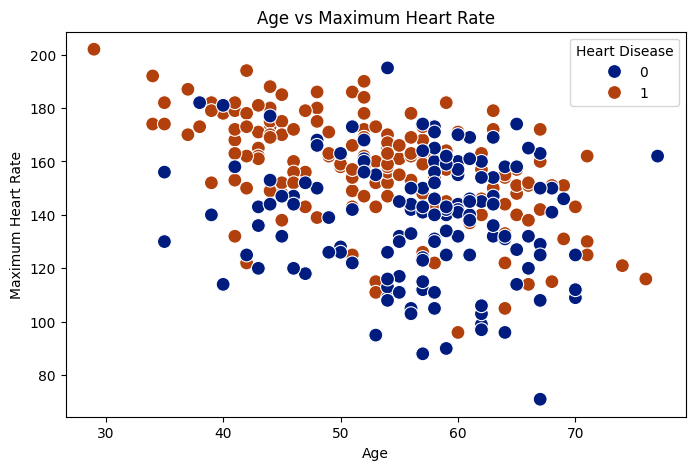

In [100]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette="dark",s=100)
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(title="Heart Disease", loc='upper right')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
X=df.iloc[:,0:13]
y=df.iloc[:, 13]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Training Data Shape: (241, 13)
Test Data Shape: (61, 13)


In [103]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

y_pred = nb_model.predict(X_test)


In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy rate: {accuracy * 100:.2f}%")

Accuracy rate: 88.52%


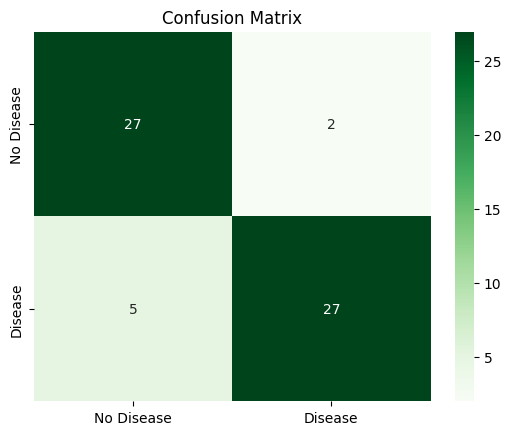

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.show()

In [106]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

